In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
from datetime import datetime
print("last update: {}".format(datetime.now())) 

last update: 2024-07-09 22:44:34.811465


In [2]:
data = pd.read_csv('D:/Mozilla downloads/archive(3)h/Churn_Modelling.csv')

In [3]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
data['Gender']=labelencoder.fit_transform(data['Gender'])
data['Geography']=labelencoder.fit_transform(data['Geography'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

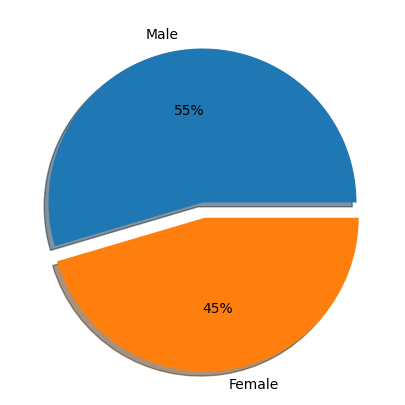

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.pie(data['Gender'].value_counts().values,labels=['Male','Female'],autopct='%.f%%',explode = [0,0.1],shadow = True)
plt.show()

In [7]:
X=data.drop(columns='Exited') # droping coulmn from the feature 
y=data['Exited']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
model.score(X_train,y_train)

1.0

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.80%


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1610
           1       0.71      0.47      0.56       390

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



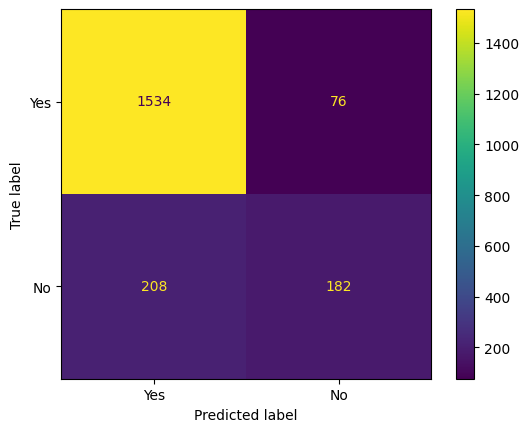

In [17]:
import matplotlib.pyplot as plt
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Yes", "No"])
cm_display.plot()
plt.show()

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
model_score=model.score(X_train,y_train)
print(model_score)

0.78775


In [21]:


#Prediction
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.798

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1610
           1       0.40      0.07      0.13       390

    accuracy                           0.80      2000
   macro avg       0.61      0.52      0.51      2000
weighted avg       0.73      0.80      0.74      2000



In [24]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [26]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


In [27]:


#Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 86.95%


In [28]:
model_names = ["Random Forest", "Logistic Regression", "Gradient Boosting"]
acc_list = []

for model in [RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)



In [29]:


#DataFrame to store results
model_results = pd.DataFrame({"Model": model_names,
                              "Accuracy_Score": acc_list})
model_results



,Model,Accuracy_Score
0,Random Forest,0.8610
1,Logistic Regression,0.7980
2,Gradient Boosting,0.8695
